In [1]:
# Start
import os
import time
print("last time run: {}".format(time.strftime("%c")))
CWD = os.getcwd()
print("Current working dir: {}".format(CWD))

last time run: Fri Mar 29 21:31:32 2019
Current working dir: /home/bren/Home/projects/Second Harvest Data Dive 20190329-30


In [2]:
# Style
from IPython.core.display  import HTML
from IPython.core.debugger import set_trace


def css_styling():
    styles = open("/home/bren/Home/python/Jupyter/Jupyter Notebooks/custom.css", "r").read()
    return HTML(styles)
css_styling()

In [3]:
# TOC Setup
import sys
toc_path = "/home/bren/miniconda3/lib/python3.7/site-packages/IPythonTOC-1.2.0-py3.7.egg"
if toc_path not in sys.path:
    sys.path.append(toc_path)
else:
    print("toc_path in sys.path already")

from IPythonTOC import IPythonTOC
toc = IPythonTOC()

toc_path in sys.path already


## Table of Contents
<a id="Table_of_Contents"></a> 

[Pallet Audit and Line](#Pallet_Audit_and_Line)
* Pareto percentages of location

[Item Master](#Item_Master) 
* Pareto Curve for product category up to 0.95 of items

[Bin Transactions](#Bin_Transactions)
* Histogram of Transactions per Month

[Inventory Transactions](#Inventory_Transactions)
* Histogram of Transactions per Month

[Order Header](#Order_Header)
* Pareto Curve for bill_to_name (customers / vendors?)
* Histogram of bill_to_city

[Order Line](#Order_Line_Details)
* 412,075 lines
* 292 items constitute 80.0% of orders and 11.4% of item
* Pareto Curve of 'item_no' up to 70% of items ordered (80% makes x axis even less clear)

[Customer and Vendor info](#Customer_and_Vendor_info)
* Not sure this is important for the problem we're attempting to address

[Item Inventory by Bin and Location](#Item_Inventory_by_Bin_and_Location)
* Not sure this is important for the problem we're attempting to address

[Item Inventory by Location](#Item_Inventory_by_Location)
* Not sure this is important for the problem we're attempting to address

[Location Description](#Location_Description)
* Not sure this is important for the problem we're attempting to address



In [4]:
# imports
from matplotlib import pyplot as plt, rcParams
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns',500)
sns.set_style('whitegrid')

%matplotlib inline
plt.style.use("ggplot")
rcParams["figure.figsize"] = (14, 7)

import IPython, platform
%reload_ext watermark
print("Python  {}".format(platform.python_version()))
%watermark -v -m -p IPython,matplotlib,numpy,pandas,seaborn

Python  3.7.1
CPython 3.7.1
IPython 7.1.1

IPython 7.1.1
matplotlib 3.0.2
numpy 1.16.1
pandas 0.23.4
seaborn 0.9.0

compiler   : GCC 7.3.0
system     : Linux
release    : 4.9.0-8-amd64
machine    : x86_64
processor  : 
CPU cores  : 8
interpreter: 64bit


In [5]:
def calcPareto(df, key_col):
    hv = df[key_col].value_counts()
    count_col = 'counter'
    pareto = pd.DataFrame(np.array([(k, int(v)) for k,v in hv.items()]),
                                columns=[key_col, count_col]).set_index(key_col, drop=True)
    pareto[count_col] = pareto[count_col].astype(int)
    pareto['pct_count'] = pareto[count_col] / pareto[count_col].sum()
    pareto['cum_pct'] = pareto.pct_count.cumsum()
    return pareto


In [6]:
def plotPareto(df, key_col, max_pct=0.85):
    from matplotlib.ticker import PercentFormatter
    from matplotlib import rcParams
    
    plt.style.use("ggplot")
    rcParams["figure.figsize"] = (14, 7)

    pareto = calcPareto(df, key_col)
    mask = pareto.cum_pct <= max_pct
    
    fig, ax = plt.subplots()
    plt.xticks(rotation=90)
    ax.bar(pareto.index[mask], pareto.counter[mask], color="C0")
    ax2 = ax.twinx()
    ax2.plot(pareto.index[mask], pareto.cum_pct[mask], color="C1", marker="D", ms=7)
    ax2.yaxis.set_major_formatter(PercentFormatter())

    ax.tick_params(axis="y", colors="C0")
    ax2.tick_params(axis="y", colors="C1")
    plt.title('Pareto for {}, max pct = {:.2%}'.format(key_col, max_pct),
              fontsize=18, loc='center')
    plt.show()


## Pallet Audit and Line
<a id='Pallet_Audit_and_Line'></a>


[Table of Contents](#Table_of_Contents)

In [7]:
df_pallet = pd.read_csv('data/PalletAuditandLine.csv', index_col = None, header = 0, low_memory=False)

In [8]:
df_pallet.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5540101 entries, 0 to 5540100
Data columns (total 13 columns):
PKG_ID        object
Item_no       object
Item_desc     object
Loc           object
Qty           float64
Weight        float64
created_tm    object
aud_tm_x      object
aud_action    object
PKG_No        int64
Bin_no        object
aud_dt        object
aud_tm_y      object
dtypes: float64(2), int64(1), object(10)
memory usage: 549.5+ MB


In [9]:
df_pallet.isna().sum(axis=0)

PKG_ID             0
Item_no            0
Item_desc          0
Loc                0
Qty                0
Weight             0
created_tm         0
aud_tm_x           0
aud_action         0
PKG_No             0
Bin_no        697175
aud_dt             0
aud_tm_y           0
dtype: int64

In [10]:
df_pallet.nunique()

PKG_ID        111669
Item_no         2052
Item_desc       1842
Loc                9
Qty             2579
Weight          3777
created_tm     33813
aud_tm_x       35999
aud_action         4
PKG_No        111669
Bin_no          3751
aud_dt           912
aud_tm_y      790397
dtype: int64

In [11]:
pareto = calcPareto(df_pallet, 'Loc')
pareto

,counter,pct_count,cum_pct
Loc,,,
1,4593625,0.829159,0.829159
3,724844,0.130836,0.959995
86,133270,0.024056,0.984050
101,28270,0.005103,0.989153
300,26040,0.004700,0.993854
406,18705,0.003376,0.997230
4,8889,0.001604,0.998834
105,5572,0.001006,0.999840
TRN,886,0.000160,1.000000


In [12]:
df_pallet.head(3)

,PKG_ID,Item_no,Item_desc,Loc,Qty,Weight,created_tm,aud_tm_x,aud_action,PKG_No,Bin_no,aud_dt,aud_tm_y
0,2F916A20-5F8C-41FA-8979-6D9A02E49D01,5311MTT,"Vegetables Canned, Asst.",1,36.0,720.0,44:53.6,44:53.6,A,203808,NaN,2018-11-19 00:00:00.000,1900-01-01 11:16:53.210
1,2F916A20-5F8C-41FA-8979-6D9A02E49D01,5311MTT,"Vegetables Canned, Asst.",1,36.0,720.0,44:53.6,44:53.6,A,203808,NaN,2018-11-20 00:00:00.000,1900-01-01 07:53:05.520
2,2F916A20-5F8C-41FA-8979-6D9A02E49D01,5311MTT,"Vegetables Canned, Asst.",1,36.0,720.0,44:53.6,44:53.6,A,203808,CA,2018-11-20 00:00:00.000,1900-01-01 07:53:05.523


In [13]:
#df_pallet.to_csv('processed/PalletAuditandLine.csv', index=False)

In [14]:
del df_pallet

## Item Master
<a id='Item_Master'></a>


[Table of Contents](#Table_of_Contents)

In [15]:
df_itemmaster = pd.read_csv('data/ItemMaster.csv', index_col = None, header = 0, low_memory=False)

In [16]:
df_itemmaster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15076 entries, 0 to 15075
Data columns (total 10 columns):
item_no            15076 non-null object
search_desc        15076 non-null object
item_desc_1        15076 non-null object
item_desc_2        15054 non-null object
prod_cat           15076 non-null object
loc                15076 non-null int64
item_weight        15076 non-null float64
item_weight_uom    15048 non-null object
p_and_ic_cd        13430 non-null object
ID                 15076 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 1.2+ MB


In [17]:
df_itemmaster.nunique()

item_no            14368
search_desc        12234
item_desc_1        12387
item_desc_2         8066
prod_cat              64
loc                   14
item_weight         1113
item_weight_uom        4
p_and_ic_cd           11
ID                 15076
dtype: int64

In [18]:
df_itemmaster.head(3)

,item_no,search_desc,item_desc_1,item_desc_2,prod_cat,loc,item_weight,item_weight_uom,p_and_ic_cd,ID
0,1,NASH TABLE CORRUGATION,Nash Table Corrugation,250/pallet,1,1,250.0,CS,DRY,12333
1,2,CREAMETTE SPAGHETTI,Creamette Spaghetti,24-7 oz,21,1,11.0,LB,DRY,611
2,28,SUN CHIPS FRENCH ONION,Sun Chips French Onion,65-1.5oz,25,1,7.0,CS,DRY,12508


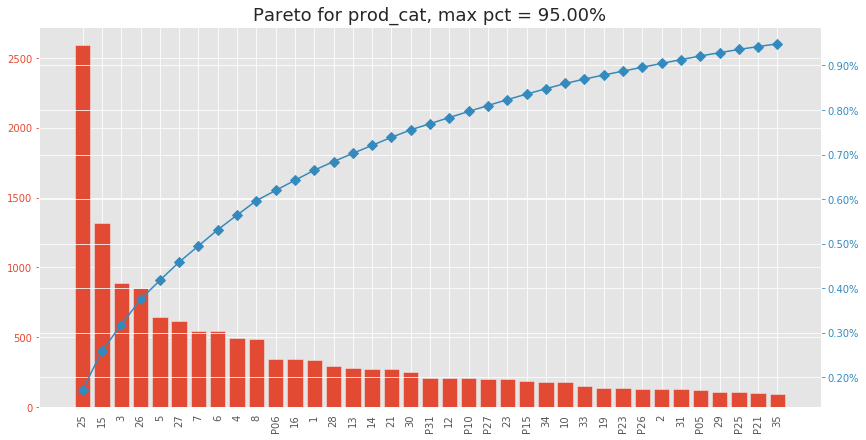

In [19]:
plotPareto(df_itemmaster, 'prod_cat', max_pct=0.95)


In [20]:
#df_itemmaster.to_csv('processed/ItemMaster.csv', index=False)

In [21]:
del df_itemmaster

## Bin Transactions
<a id='Bin_Transactions'></a>


[Table of Contents](#Table_of_Contents)

In [22]:
df_bintrans = pd.read_csv('data/BinTransactions.csv', index_col = None, header = 0, low_memory=False)

In [23]:
df_bintrans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1357008 entries, 0 to 1357007
Data columns (total 7 columns):
ord_no     1357008 non-null int64
bin_no     1357008 non-null object
item_no    1357008 non-null object
trx_dt     1357008 non-null object
year       1357008 non-null int64
month      1357008 non-null int64
day        1357008 non-null int64
dtypes: int64(4), object(3)
memory usage: 72.5+ MB


In [24]:
df_bintrans.head(3)

,ord_no,bin_no,item_no,trx_dt,year,month,day
0,1947879,SHIP,1403181,2016-06-30,2016,6,30
1,1947880,$J22A,76150OA,2016-06-30,2016,6,30
2,1947881,%SHIP,1403181,2016-06-30,2016,6,30


In [25]:
df_bintrans.nunique()

ord_no     562066
bin_no       4472
item_no      3418
trx_dt       1060
year            5
month          12
day            31
dtype: int64

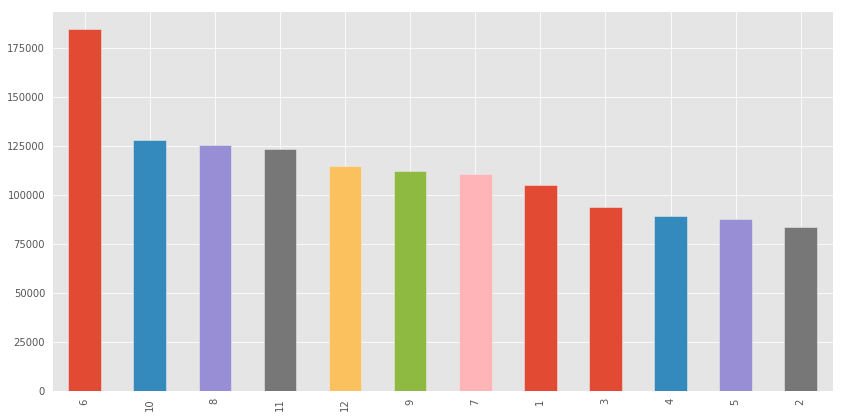

In [26]:
df_bintrans.month.value_counts().plot.bar();

In [27]:
#df_bintrans.to_csv('processed/BinTransactions.csv', index=False)

In [28]:
del df_bintrans

## Inventory Transactions
<a id='Inventory_Transactions'></a>


[Table of Contents](#Table_of_Contents)

In [29]:
df_invtrans = pd.read_csv('data/InventoryTransactions.csv', index_col = None, header = 0, low_memory=False)

In [30]:
df_invtrans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076857 entries, 0 to 3076856
Data columns (total 11 columns):
source      object
line_no     int64
lev_no      int64
seq_no      int64
item_no     object
loc         object
trx_tm      object
doc_type    object
year        int64
month       int64
day         int64
dtypes: int64(6), object(5)
memory usage: 258.2+ MB


In [31]:
df_invtrans.head(3)

,source,line_no,lev_no,seq_no,item_no,loc,trx_tm,doc_type,year,month,day
0,B,0,0,0,08020,TRN,1900-01-01 17:40:57.707,H,2017,8,31
1,B,0,0,1,080206,01,1900-01-01 17:40:57.707,H,2017,8,31
2,B,0,0,2,080206,TRN,1900-01-01 17:40:57.707,H,2017,8,31


In [32]:
df_invtrans['YMD'] = pd.to_datetime(df_invtrans['year month day'.split(' ')])

In [33]:
df_invtrans.nunique()

source            6
line_no         186
lev_no           10
seq_no         7129
item_no       15094
loc              25
trx_tm      1073080
doc_type         11
year              5
month            12
day              31
YMD            1089
dtype: int64

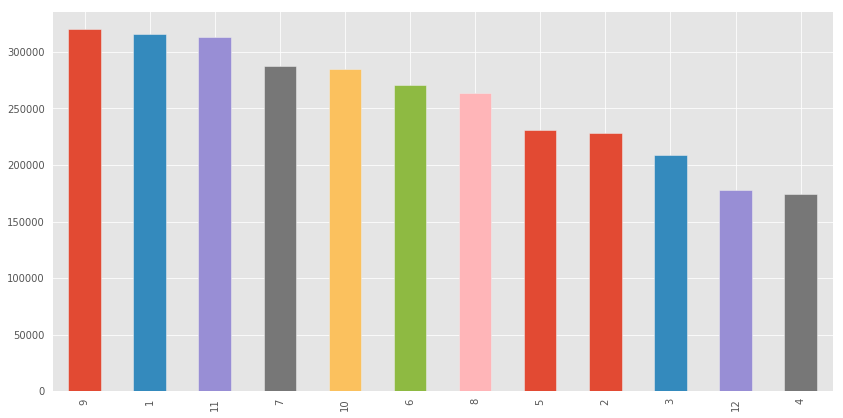

In [34]:
df_invtrans.month.value_counts().plot.bar();

In [35]:
#df_invtrans.to_csv('processed/InventoryTransactions.csv', index=False)

In [36]:
del df_invtrans

## Order Header
<a id='Order_Header'></a>


[Table of Contents](#Table_of_Contents)

In [37]:
df_orderheader = pd.read_csv('data/OrderHeader.csv', index_col = None, header = 0, low_memory=False)

In [38]:
df_orderheader.head(3)

,ord_no,apply_to_no,oe_po_no,cus_no,bal_meth,bill_to_name,bill_to_addr_1,bill_to_addr_2,bill_to_addr_3,bill_to_addr_city,bill_to_state,bill_to_addr_zip,ar_terms_cd,frt_pay_cd,slspsn_no,slspsn_pct_comm,slspsn_comm_amt,slspsn_no_2,slspsn_pct_comm_2,slspsn_comm_amt_2,mfg_loc
0,176761,0.0,16-012,2557,O,BurksMiddle School;Putnam Co Board of Ed,300 Crossville Street,NaN,NaN,Duquesne,PA,15110,US,00:00.0,N,NaN,NaN,57,100,0.0,0
1,178104,0.0,16-012,2557,O,BurksMiddle School;Putnam Co Board of Ed,300 Crossville Street,NaN,NaN,Duquesne,PA,15110,US,00:00.0,N,NaN,NaN,57,100,0.0,0
2,170884,0.0,,530,O,Good Samaritan/Manchester,PO Box 281,NaN,NaN,Sharon,PA,16146,US,00:00.0,N,K-55338,NaN,57,100,0.0,0


In [39]:
df_orderheader.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56850 entries, 0 to 56849
Data columns (total 21 columns):
ord_no               56850 non-null int64
apply_to_no          16561 non-null float64
oe_po_no             56850 non-null object
cus_no               56850 non-null object
bal_meth             56850 non-null object
bill_to_name         56848 non-null object
bill_to_addr_1       54974 non-null object
bill_to_addr_2       9276 non-null object
bill_to_addr_3       249 non-null object
bill_to_addr_city    55555 non-null object
bill_to_state        56751 non-null object
bill_to_addr_zip     55407 non-null object
ar_terms_cd          56143 non-null object
frt_pay_cd           56750 non-null object
slspsn_no            4711 non-null object
slspsn_pct_comm      35252 non-null object
slspsn_comm_amt      54365 non-null object
slspsn_no_2          56526 non-null object
slspsn_pct_comm_2    56618 non-null object
slspsn_comm_amt_2    56815 non-null float64
mfg_loc              55446 non-nul

In [40]:
df_orderheader.nunique()

ord_no               56843
apply_to_no           1182
oe_po_no              4070
cus_no                1067
bal_meth                 5
bill_to_name          2343
bill_to_addr_1        1298
bill_to_addr_2         189
bill_to_addr_3          10
bill_to_addr_city      344
bill_to_state           57
bill_to_addr_zip       389
ar_terms_cd             51
frt_pay_cd              41
slspsn_no              575
slspsn_pct_comm         80
slspsn_comm_amt         64
slspsn_no_2             83
slspsn_pct_comm_2       15
slspsn_comm_amt_2        8
mfg_loc                 18
dtype: int64

In [41]:
order_pareto = calcPareto(df_orderheader, 'bill_to_name')
order_pareto.head(100)

,counter,pct_count,cum_pct
bill_to_name,,,
Christian Coop. Ministry,610,0.010730,0.010730
Martha O'Bryan Center EFB,600,0.010554,0.021285
Manna Cafe Ministries,498,0.008760,0.030045
The Branch,487,0.008567,0.038612
Bridge Ministries The,476,0.008373,0.046985
MAIN WAREHOUSE a/r,469,0.008250,0.055235
St. Luke's Community House EFB,438,0.007705,0.062940
Here Am I Missions,420,0.007388,0.070328
The Little Pantry That Could,404,0.007107,0.077435


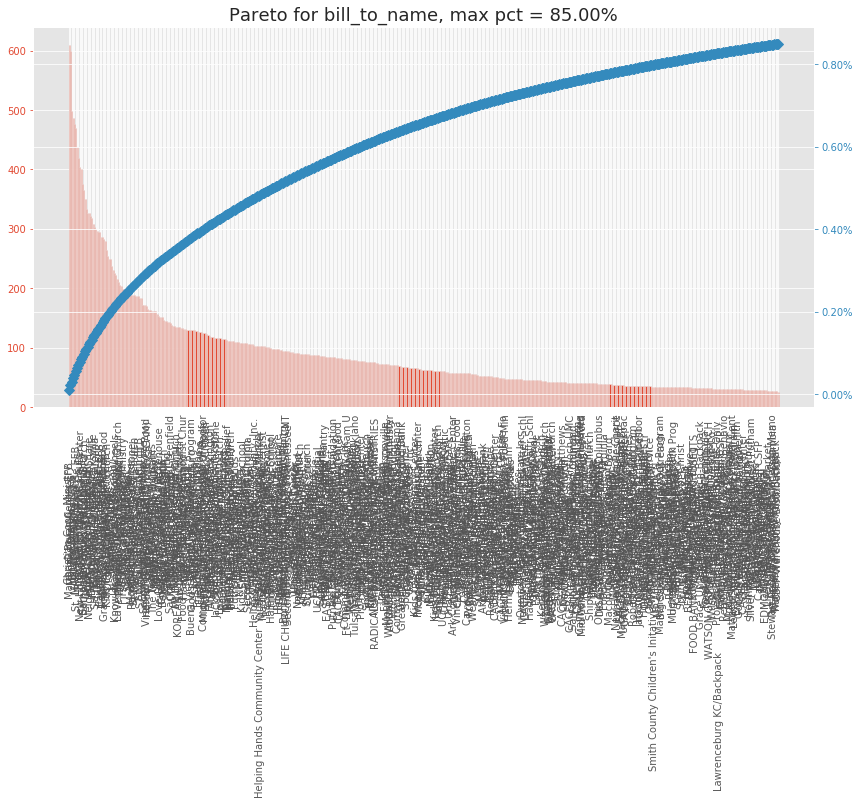

In [42]:
plotPareto(df_orderheader, 'bill_to_name')

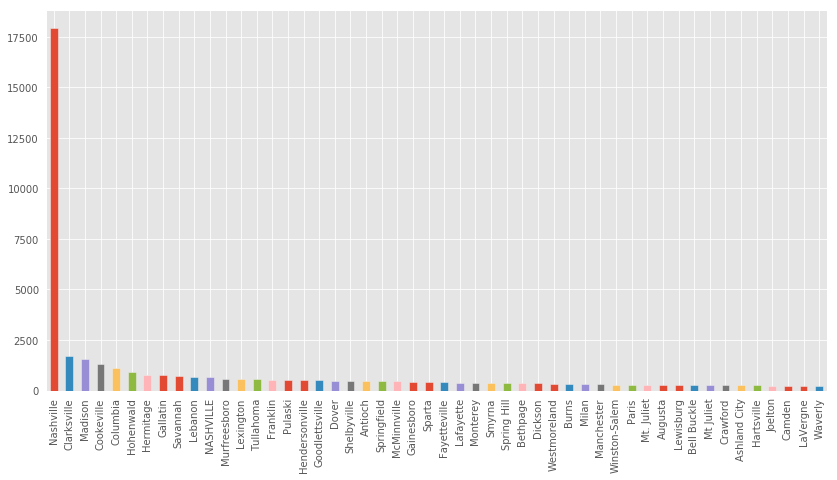

In [43]:
hv = df_orderheader.bill_to_addr_city.value_counts().head(50).plot.bar();


In [44]:
df_orderheader.nunique()

ord_no               56843
apply_to_no           1182
oe_po_no              4070
cus_no                1067
bal_meth                 5
bill_to_name          2343
bill_to_addr_1        1298
bill_to_addr_2         189
bill_to_addr_3          10
bill_to_addr_city      344
bill_to_state           57
bill_to_addr_zip       389
ar_terms_cd             51
frt_pay_cd              41
slspsn_no              575
slspsn_pct_comm         80
slspsn_comm_amt         64
slspsn_no_2             83
slspsn_pct_comm_2       15
slspsn_comm_amt_2        8
mfg_loc                 18
dtype: int64

In [45]:
order_pareto = calcPareto(df_orderheader, 'mfg_loc')
order_pareto

,counter,pct_count,cum_pct
mfg_loc,,,
1,44314,0.799228,0.799228
99,2961,0.053403,0.852631
0,2732,0.049273,0.901905
206,2424,0.043718,0.945623
500,1509,0.027216,0.972838
406,650,0.011723,0.984562
103,213,0.003842,0.988403
68,194,0.003499,0.991902
390,184,0.003319,0.995221


In [46]:
#df_orderheader.to_csv('processed/OrderHeader.csv', index=False)

In [47]:
try:
    del df_orderheader
except:
    pass

## Order Line Details
<a id='Order_Line_Details'></a>


[Table of Contents](#Table_of_Contents)

In [48]:
df_orderline = pd.read_csv('data/OrderLine.csv', index_col = None, header = 0, low_memory=False)

In [49]:
df_orderline['item_no'] = df_orderline.item_no.apply(lambda x: x.strip()) # some extra spaces at end to remove
ln = df_orderline.item_no.unique()

In [50]:
df_orderline.sample(100)['item_no'].values

array(['97554OA', '110623', '1805307', '230DS', 'OS7011', '0015OA',
       '80117OA', '80651OA', '57999OA', '230S', '230P', '23660OA',
       '6464OA', 'OS7006', '100395', '1607255', '23142OA', '230DS',
       '88288OA', '5339MTT', '9904SFSP', '5339MTT', '9907CACFP',
       '1610191', '1609061', '100380', '7007', '5304MTT', 'OS7008',
       '1808071', '1704261', '55055OA', '1406173', '71120OA', '5339MTT',
       '97421OA', '5333MTT', '1602233', '1508261', '07259OA', 'MTTPROD',
       '20095BP', '1511123', '100936', '7007', '98770OA', '81684OA',
       '5339MTT', '1604291', 'OS7006', '5339MTT', '20075BP', '1705031',
       '6092CC', 'OS7006', '1605173', '100382', '100306', '80651OA',
       '007GRM', '5364MTT', '98540OA', '01091OA', '55055OA', 'OS7006',
       '7007', '9902SFSP', '1601193', '230B', 'OS7006', '0015OA', '12081',
       '16320OA', '70451OA', '93008OA', '80651OA', '97010OA', '7007',
       '1803262', '93008OA', '97554OA', '7007', '100290', '100275',
       '97564OA', '10031

In [51]:
df_orderline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412075 entries, 0 to 412074
Data columns (total 11 columns):
ord_type             412075 non-null object
ord_no               412075 non-null int64
line_seq_no          412075 non-null int64
item_no              412075 non-null object
loc                  412075 non-null int64
item_desc_1          411854 non-null object
item_desc_2          411631 non-null object
qty_ordered          412075 non-null float64
prc_cd_orig_price    412072 non-null float64
cus_no               412075 non-null int64
ID                   412072 non-null float64
dtypes: float64(3), int64(4), object(4)
memory usage: 34.6+ MB


In [52]:
df_orderline.nunique()

ord_type                  1
ord_no                56826
line_seq_no             181
item_no                2560
loc                      17
item_desc_1            2405
item_desc_2            1722
qty_ordered            6585
prc_cd_orig_price      5975
cus_no                 1063
ID                   412072
dtype: int64

In [53]:
ol = calcPareto(df_orderline, 'item_no')
max_pct = 0.8

print('{:5,d} items constitute {:.1%} of orders and {:.1%} of item'.format(sum(ol.cum_pct <= max_pct), max_pct,
                                                                           sum(ol.cum_pct <= max_pct) / len(ol)))


  292 items constitute 80.0% of orders and 11.4% of item


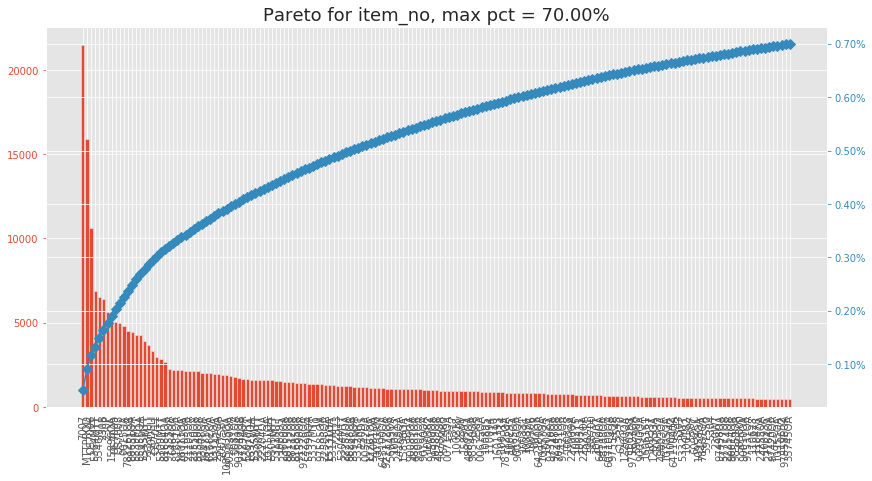

In [54]:
plotPareto(df_orderline, 'item_no', max_pct=0.7) # pretty crowded even at 70% but a smooth curve

In [55]:
#df_orderline.to_csv('processed/OrderLine.csv', index=False)

In [56]:
del df_orderline

## Customer and Vendor info
<a id='Customer_and_Vendor_info'></a>

Not interesting

[Table of Contents](#Table_of_Contents)

In [57]:
import pandas as pd

In [58]:
df_custvendor = pd.read_csv('data/CustomerandVendor.csv', index_col = None, header = 0, low_memory=False)

In [59]:
df_custvendor.head(3)

,cus_no,cmp_name,Address,City,StateCode,ZipCode
0,10090.0,Simon's Produce ...,777 Clay Cole Rd,Elkton,KY,NaN
1,3474.0,Allen Lund Company LLC ...,PO Box 51083,Los Angeles,CA,90051
2,9390.0,"Escreen, Inc. ...","7500 W 110th Street, Suite 500",Overland Park,KS,66210


In [60]:
df_custvendor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9058 entries, 0 to 9057
Data columns (total 6 columns):
cus_no       7903 non-null float64
cmp_name     9058 non-null object
Address      8951 non-null object
City         9044 non-null object
StateCode    9018 non-null object
ZipCode      6561 non-null object
dtypes: float64(1), object(5)
memory usage: 424.7+ KB


In [61]:
#df_custvendor.to_csv('processed/CustomerandVendor.csv', index=False)

In [62]:
del df_custvendor

## Item Inventory by Bin and Location
<a id='Item_Inventory_by_Bin_and_Location'></a>

Not interesting


[Table of Contents](#Table_of_Contents)

In [63]:
df_iteminvbinloc = pd.read_csv('data/ItemInvBinLoc.csv', index_col = None, header = 0, low_memory=False)

In [64]:
df_iteminvbinloc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92091 entries, 0 to 92090
Data columns (total 13 columns):
item_no           92091 non-null object
loc               92091 non-null int64
bin_no            92091 non-null object
bin_priority      92091 non-null int64
issue_priority    92091 non-null object
unit_cost         92091 non-null float64
orig_cost         92091 non-null float64
qty_on_hand       92091 non-null int64
qty_allocated     92091 non-null int64
qty_on_ord        92091 non-null int64
frz_cost          92091 non-null float64
frz_qty           92091 non-null int64
ID                92091 non-null int64
dtypes: float64(3), int64(7), object(3)
memory usage: 9.1+ MB


In [65]:
df_iteminvbinloc.nunique()

item_no            3457
loc                   9
bin_no             4585
bin_priority          3
issue_priority     4854
unit_cost          9038
orig_cost          8154
qty_on_hand        1018
qty_allocated       126
qty_on_ord            1
frz_cost            999
frz_qty             497
ID                92091
dtype: int64

In [66]:
#df_iteminvbinloc.to_csv('processed/ItemInvBinLoc.csv', index=False)

In [67]:
del df_iteminvbinloc

## Item Inventory by Location
<a id='Item_Inventory_by_Location'></a>

Not interesting

[Table of Contents](#Table_of_Contents)

In [68]:
df_iteminvloc = pd.read_csv('data/ItemInvLoc.csv', index_col = None, header = 0, low_memory=False)

In [69]:
df_iteminvloc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33842 entries, 0 to 33841
Data columns (total 14 columns):
item_no           33842 non-null object
loc               33842 non-null object
status            33842 non-null object
mult_bin_fg       33842 non-null object
qty_on_hand       33842 non-null int64
qty_allocated     33842 non-null int64
reorder_lvl       33842 non-null int64
price             33842 non-null float64
avg_cost          33842 non-null float64
last_cost         33842 non-null float64
std_cost          33842 non-null float64
qty_last_sold     33842 non-null int64
cycle_count_cd    14334 non-null object
inv_class         33841 non-null object
dtypes: float64(4), int64(4), object(6)
memory usage: 3.6+ MB


In [70]:
df_iteminvloc.nunique()

item_no           14366
loc                  25
status                1
mult_bin_fg           2
qty_on_hand         571
qty_allocated       335
reorder_lvl         167
price              1646
avg_cost           3124
last_cost          2361
std_cost           1749
qty_last_sold       666
cycle_count_cd        4
inv_class             3
dtype: int64

In [71]:
df_iteminvloc.head(3)

,item_no,loc,status,mult_bin_fg,qty_on_hand,qty_allocated,reorder_lvl,price,avg_cost,last_cost,std_cost,qty_last_sold,cycle_count_cd,inv_class
0,1,1,A,Y,0,0,0,0.0,0.0,0.0,0.0,0,Z,A
1,1,TRN,A,N,0,0,0,0.0,0.0,0.0,0.0,0,NaN,A
2,2,1,A,Y,0,0,0,0.0,0.0,0.0,0.0,0,Z,A


In [72]:
#df_iteminvloc.to_csv('processed/ItemInvLoc.csv', index=False)

In [73]:
del df_iteminvloc

## Location Description
<a id='Location_Description'></a>

Not interesting

[Table of Contents](#Table_of_Contents)

In [74]:
df_locdescript = pd.read_csv('data/LocationDescription.csv', index_col = None, header = 0, low_memory=False)

In [75]:
df_locdescript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 12 columns):
loc            25 non-null object
loc_desc       25 non-null object
mult_bin_fg    25 non-null object
mrp_fg         25 non-null object
addr_1         24 non-null object
addr_2         23 non-null object
addr_3         0 non-null float64
city           23 non-null object
state          23 non-null object
zip            23 non-null float64
country        24 non-null object
phone_no       15 non-null object
dtypes: float64(2), object(10)
memory usage: 2.4+ KB


In [76]:
df_locdescript.nunique()

loc            25
loc_desc       25
mult_bin_fg     2
mrp_fg          1
addr_1         15
addr_2         15
addr_3          0
city            8
state           3
zip            12
country         1
phone_no       10
dtype: int64

In [77]:
df_locdescript.head(3)

,loc,loc_desc,mult_bin_fg,mrp_fg,addr_1,addr_2,addr_3,city,state,zip,country,phone_no
0,1,Main Warehouse,Y,N,Second Harvest Food Bank of Middle TN,331 Great Circle Road,NaN,Nashville,TN,37228.0,US,615-627-1596
1,3,SALVAGE ROOM,N,N,Second Harvest Food Bank of Middle TN,331 Great Circle Rd,NaN,Nashville,TN,37228.0,US,NaN
2,4,Smyrna Salvage,N,N,Second Harvest Food Bank Mid TN Smyrna,1958 Almaville Road,NaN,Smyrna,TN,37167.0,US,615-365-9950


In [78]:
#df_locdescript.to_csv('processed/LocationDescription.csv', index=False)

In [79]:
del df_locdescript